In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Data Preparation

In [271]:
class_name = 'Occupancy'

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')

dataset_path="/content/drive/Shared drives/DM2/files/combined2.csv"
df = pd.read_csv(dataset_path, parse_dates=True, index_col='Date', date_parser=dateparse)

df.head()

del df['Hour']
del df['Day']
del df['TimeSlot']
del df['Weekend']
del df['WorkingHour']

#del df['Temperature']
#del df['Humidity']
#del df['Light']
#del df['CO2']
#del df['HumidityRatio']


df.loc[df["Occupancy"] == 1, "Occupancy"] = 'Yes'
df.loc[df["Occupancy"] == 0, "Occupancy"] = 'No'




df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Date,,,,,,
2015-02-02 14:19:00,15.904468,8.698835,7.516689,5.235582,10.795786,Yes
2015-02-02 14:20:00,15.957720,8.711492,7.452585,5.343291,10.831549,Yes
2015-02-02 14:21:00,15.993220,8.669303,7.398537,5.432407,10.799950,Yes
2015-02-02 14:22:00,15.971032,8.595474,6.654588,5.481292,10.709977,Yes
2015-02-02 14:23:00,16.064222,8.648209,6.606039,5.522164,10.806016,Yes
...,...,...,...,...,...,...
2015-02-18 09:15:00,7.369492,9.715227,6.051259,12.506386,8.476117,Yes
2015-02-18 09:16:00,7.517411,9.734564,5.992341,12.595342,8.548897,Yes
2015-02-18 09:17:00,7.591371,9.734564,5.992341,12.662660,8.576488,Yes


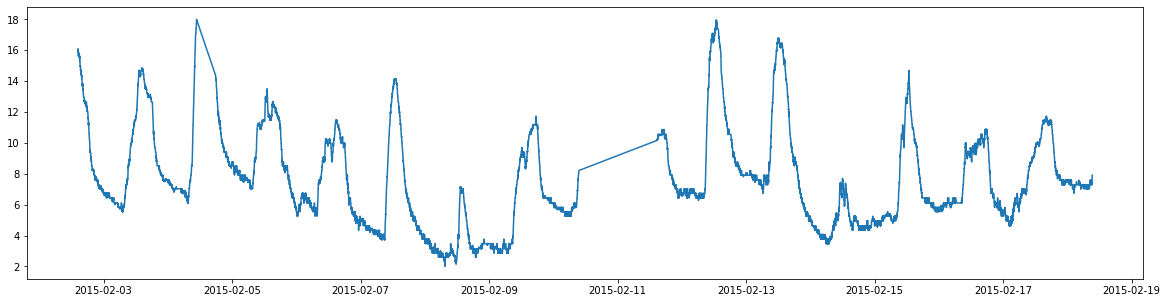

In [129]:
ts = df['Temperature']

plt.figure(figsize=(20,5))
plt.plot(ts)
plt.show()

In [96]:
ts = ts.values
ts

array([15.90446841, 15.95771957, 15.99322034, ...,  7.59137134,
        7.59137134,  7.91679507])

In [7]:
!pip install tslearn
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import SymbolicAggregateApproximation

     |████████████████████████████████| 747kB 2.7MB/s 


#una sola time series

In [0]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts = scaler.fit_transform(ts)

In [0]:
# SAX transform
n_paa_segments = 20
n_sax_symbols = 10
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(ts)
sax_ts_inv = sax.inverse_transform(ts_sax)

In [132]:
sax_ts_inv.ravel()

array([0.38532047, 0.38532047, 0.38532047, ..., 0.12566135, 0.12566135,
       0.12566135])

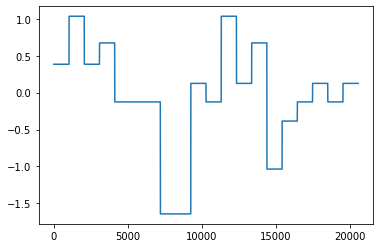

In [133]:
plt.plot(sax_ts_inv.ravel())
plt.show()

In [134]:
map_symbols = {k: v for v, k in enumerate(np.unique(sax_ts_inv.ravel()))}
map_symbols

{-1.6448536269514729: 0,
 -1.0364333894937898: 1,
 -0.38532046640756773: 2,
 -0.12566134685507402: 3,
 0.12566134685507416: 4,
 0.38532046640756773: 5,
 0.6744897501960817: 6,
 1.0364333894937898: 7}

In [0]:
seq = np.array([map_symbols[v] for v in sax_ts_inv.ravel()])

In [270]:
print (seq)

[5 5 5 ... 4 4 4]


#PIU' TIME SERIES

In [275]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')

dataset_path="/content/drive/Shared drives/DM2/files/temporal_splits/split_df1_30min_Temperature.csv"
X = pd.read_csv(dataset_path, parse_dates=True,  date_parser=dateparse)
del X['TimeSlot']
del X['Weekend']
del X['WorkingHour']
del X['Occupancy']
del X['Unnamed: 0']
X = X.to_numpy()
X

array([[15.90446841, 15.90446841, 15.90446841, ..., 15.60862866,
        15.60862866, 15.60862866],
       [15.60862866, 15.53466872, 15.43112481, ..., 14.69152542,
        14.69152542, 14.69152542],
       [14.69152542, 14.69152542, 14.69152542, ..., 13.89275809,
        13.86317411, 13.83359014],
       ...,
       [ 8.50847458,  8.57503852,  8.61497689, ..., 11.28936826,
        11.46687211, 11.73312789],
       [11.73312789, 11.73312789, 11.83174114, ..., 14.42526965,
        14.69152542, 14.69152542],
       [14.75069337, 14.98736518, 14.91340524, ..., 17.08782743,
        17.08782743, 17.08782743]])

In [0]:
X = X.reshape(88,30,1)

In [0]:
X = scaler.fit_transform(X)

In [278]:
X_sax.shape

(88, 20, 1)

In [0]:
X_sax = sax.transform(X)
sax_X_inv = sax.inverse_transform(X_sax)

In [280]:
sax_X_inv.shape

(88, 20560, 1)

In [0]:
X_seq = list()
for x in sax_X_inv:
    X_seq.append([map_symbols.get(v, -1) for v in x.ravel()])

In [256]:
len(X_seq[0])

20560

In [252]:
X_seq[4][:20]

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1]

In [253]:
len(X_seq[2])

20560

In [254]:
X_seq

[[-1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1

# Sequential Pattern Mining

In [17]:
!pip install prefixspan
from prefixspan import PrefixSpan

  Created wheel for prefixspan: filename=prefixspan-0.5.2-cp36-none-any.whl size=11219 sha256=d851e09030314706d29ce8c43bfd1e20fe42f38dba62d30fa7f6861a20808034
  Stored in directory: /root/.cache/pip/wheels/31/73/e2/681c2d81b43389e5c8532de53dffc444304367c903026d4ba0
  Created wheel for extratools: filename=extratools-0.8.2.1-cp36-none-any.whl size=28870 sha256=625358f12706d8656a4ee72fed85c342b72004d437eb82658defcdb29a44c9f4
  Stored in directory: /root/.cache/pip/wheels/54/b8/e5/6ae8626c4b1543fecdcf15ead7e78bdf7ab7d42ee2076cb56b
Successfully built prefixspan extratools


https://github.com/chuanconggao/PrefixSpan-py
    
https://pypi.org/project/prefixspan/

In [0]:
db = [
    [0, 1, 2, 3, 4],
    [1, 1, 1, 3, 4],
    [2, 1, 2, 2, 0],
    [1, 1, 1, 2, 2],
]

ps = PrefixSpan(X_seq)

In [267]:
ps.frequent(3)

RecursionError: ignored

In [0]:
db = [
    [(0, 1), (1, 2), (3, 4), (1)],
    [(1, 1), (1, 3, 4)],
    [(2), (1, 2), (2, 0), (1)],
    [(1, 1), (1, 2), (2), (1)],
]

ps = PrefixSpan(db)

In [0]:
ps.frequent(3)

[(3, [(1, 2)]), (3, [(1, 2), 1]), (3, [1])]

In [0]:
ps.frequent(3, closed=True)

[(3, [(1, 2), 1])]

In [0]:
ps = PrefixSpan(X_seq)

In [0]:
ps.frequent(97)

[(97, [1]),
 (97, [1, 1]),
 (97, [1, 1, 1]),
 (97, [1, 1, 1, 1]),
 (97, [1, 1, 1, 1, 1]),
 (97, [1, 1, 1, 1, 1, 1]),
 (97, [1, 1, 1, 1, 1, 1, 1]),
 (97, [1, 1, 1, 1, 1, 1, 1, 5]),
 (97, [1, 1, 1, 1, 1, 1, 1, 5, 5]),
 (97, [1, 1, 1, 1, 1, 1, 1, 5, 5, 5]),
 (97, [1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5]),
 (97, [1, 1, 1, 1, 1, 1, 5]),
 (97, [1, 1, 1, 1, 1, 1, 5, 5]),
 (97, [1, 1, 1, 1, 1, 1, 5, 5, 5]),
 (97, [1, 1, 1, 1, 1, 1, 5, 5, 5, 5]),
 (97, [1, 1, 1, 1, 1, 5]),
 (97, [1, 1, 1, 1, 1, 5, 5]),
 (97, [1, 1, 1, 1, 1, 5, 5, 5]),
 (97, [1, 1, 1, 1, 1, 5, 5, 5, 5]),
 (97, [1, 1, 1, 1, 5]),
 (97, [1, 1, 1, 1, 5, 5]),
 (97, [1, 1, 1, 1, 5, 5, 5]),
 (97, [1, 1, 1, 1, 5, 5, 5, 5]),
 (97, [1, 1, 1, 5]),
 (97, [1, 1, 1, 5, 5]),
 (97, [1, 1, 1, 5, 5, 5]),
 (97, [1, 1, 1, 5, 5, 5, 5]),
 (97, [1, 1, 5]),
 (97, [1, 1, 5, 5]),
 (97, [1, 1, 5, 5, 5]),
 (97, [1, 1, 5, 5, 5, 5]),
 (97, [1, 5]),
 (97, [1, 5, 5]),
 (97, [1, 5, 5, 5]),
 (97, [1, 5, 5, 5, 5]),
 (100, [5]),
 (100, [5, 5]),
 (100, [5, 5, 5]),
 (100, 

In [0]:
ps.frequent(97, closed=True)

[(97, [1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5]), (100, [5, 5, 5, 5])]

In [0]:
ps.topk(10)

[(100, [5]),
 (100, [5, 5]),
 (100, [5, 5, 5]),
 (100, [5, 5, 5, 5]),
 (97, [1]),
 (97, [1, 1]),
 (97, [1, 1, 1]),
 (97, [1, 1, 1, 1]),
 (97, [1, 1, 1, 1, 1]),
 (97, [1, 1, 1, 1, 1, 1])]

In [0]:
ps.topk(10, closed=True)

[(100, [5, 5, 5, 5]),
 (97, [1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5]),
 (91, [2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5]),
 (90, [8, 8, 8, 8, 8, 8, 8, 5, 5, 5, 5]),
 (87, [-1, -1, -1, -1, -1, -1, -1, 5, 5, 5, 5]),
 (87, [6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5]),
 (87, [9, 9, 9, 9, 9, 9, 9, 5, 5, 5, 5]),
 (84, [3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5]),
 (82, [4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5]),
 (80, [7, 7, 7, 7, 7, 7, 7, 5, 5, 5, 5])]